# Biblioteki

In [102]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import random
from datetime import datetime, timedelta

# Pobranie Danych o najpopularniejszych imionach i nazwisakch z GUS'u
# Pobieranie Danych o Ulicach z TECH

In [103]:
fn = pd.read_csv('ZI.csv').head(500)
mn = pd.read_csv('MI.csv').head(500)
fsn = pd.read_csv('ZN.csv').head(500)
msn = pd.read_csv('MN.csv').head(500)

fn = fn['IMIĘ_PIERWSZE'].tolist()
mn = mn['IMIĘ_PIERWSZE'].tolist()
fsn = fsn['Nawisko aktualne'].tolist()
msn = msn['Nawisko aktualne'].tolist()


s_zg = pd.read_csv('UliceZg.csv', delimiter=';', skiprows=5)
s_wro = pd.read_csv('UliceWro.csv', delimiter=';', skiprows=5)
s_wal = pd.read_csv('UliceWal.csv', delimiter=';', skiprows=5)
s_op = pd.read_csv('UliceOpole.csv', delimiter=';', skiprows=5)
s_lesz = pd.read_csv('UliceLeszno.csv', delimiter=';', skiprows=5)
s_leg = pd.read_csv('UliceLeg.csv', delimiter=';', skiprows=5)
s_jel = pd.read_csv('UliceJel.csv', delimiter=';', skiprows=5)

streets = {
    'Zielona Góra': s_zg['NAZWA_1'].tolist(),
    'Wrocław': s_wro['NAZWA_1'].tolist(),
    'Wałbrzych': s_wal['NAZWA_1'].tolist(),
    'Opole': s_op['NAZWA_1'].tolist(),
    'Leszno': s_lesz['NAZWA_1'].tolist(),
    'Legnica': s_leg['NAZWA_1'].tolist(),
    'Jelenia Góra': s_jel['NAZWA_1'].tolist(),
}

rs = pd.read_csv('RS.csv')

## 1.Wypełnienie Skryptowe

### 1.1. Klienci:

In [104]:
def Klienci():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host = "giniewicz.it",
            user = "team16",
            password = "---",
            database = "team16"
        )
        
        if connection.is_connected():
            cursor = connection.cursor()
            
            # Tworzenie tabeli Klienci, jeśli jeszcze nie istnieje
            create_table_query = '''
            CREATE TABLE IF NOT EXISTS Klienci (
                id_klienta VARCHAR(4) NOT NULL PRIMARY KEY,
                imie VARCHAR(255) NOT NULL,
                nazwisko VARCHAR(255) NOT NULL
            )
            '''
            cursor.execute(create_table_query)
            print("Table `Klienci` created successfully")
            cursor.execute("SET FOREIGN_KEY_CHECKS = 0")

            
            cursor.execute("DELETE FROM Pojazdy")
            cursor.execute("DELETE FROM Klienci")
            
            cursor.execute("SET FOREIGN_KEY_CHECKS = 1")
            delete_all_query = "DELETE FROM Adresy"
            cursor.execute(delete_all_query)
            print("All data deleted from `Adresy` table")
            delete_all_query = "DELETE FROM Klienci"
            cursor.execute(delete_all_query)
            print("All data deleted from `Klienci` table")
             

            # Zapytanie SQL do wstawienia rekordu
            for _ in range(1000):
                if random.choice([True, False]):  # Losowanie Płci
                    name = random.choice(fn)
                    surname = random.choice(fsn)
                else:
                    name = random.choice(mn)
                    surname = random.choice(msn)

                client_id = f"{_+1:04d}"  # Generowanie id_klienta
                sql_insert_query = "INSERT INTO Klienci (id_klienta, imie, nazwisko) VALUES (%s, %s, %s)"
                cursor.execute(sql_insert_query, (client_id, name, surname))
            
            # Zatwierdzenie zmian w bazie danych
            connection.commit()
            print("Record inserted successfully into Klienci table")

            # Wyświetlenie zawartości tabeli Klienci
            cursor.execute("SELECT * FROM Klienci")
            rows = cursor.fetchall()
            print("Table `Klienci` content:")
            for row in rows:
                print(row)

    except Error as e:
        print(f"Error while connecting to MySQL: {e}")

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

### 1.2. Adresów

In [105]:
def generate_address_data(client_id):
    cities = ['Wrocław', 'Zielona Góra', 'Legnica', 'Wałbrzych', 'Opole', 'Leszno', 'Jelenia Góra']
    city = random.choice(cities)
    street = random.choice(streets[city])
    building_number = str(random.randint(1, 100))
    phone_number = f"+48 {random.randint(100, 999)} {random.randint(100, 999)} {random.randint(100, 999)}"
    
    return (client_id, city, street, building_number, phone_number)


In [106]:
def Adresy():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host = "giniewicz.it",
            user = "team16",
            password = "---",
            database = "team16"
        )
        
        if connection.is_connected():
            cursor = connection.cursor()
            
            # Tworzenie tabeli Adresy, jeśli jeszcze nie istnieje
            create_table_query ='''
            CREATE TABLE IF NOT EXISTS Adresy (
                id_klienta VARCHAR(4) PRIMARY KEY,
                miasto VARCHAR(255) NOT NULL,
                ulica VARCHAR(255) NOT NULL,
                nr_budynku VARCHAR(10) NOT NULL,
                nr_telefonu VARCHAR(15) NOT NULL,
                FOREIGN KEY (id_klienta) REFERENCES Klienci(id_klienta)
            )
            '''
            cursor.execute(create_table_query)
            print("Table `Adresy` created successfully")

            # Pobieranie id_klienta z tabeli Klienci
            cursor.execute("SELECT id_klienta FROM Klienci")
            client_ids = cursor.fetchall()
            
            # Usunięcie wszystkich danych z tabeli Adresy
            delete_all_query = "DELETE FROM Adresy"
            cursor.execute(delete_all_query)
            print("All data deleted from `Adresy` table")

            # Wstawianie nowych adresów do tabeli Adresy
            for client_id_tuple in client_ids:
                client_id = client_id_tuple[0]
                address_data = generate_address_data(client_id)
                sql_insert_query = "INSERT INTO Adresy (id_klienta, miasto, ulica, nr_budynku, nr_telefonu) VALUES (%s, %s, %s, %s, %s)"
                cursor.execute(sql_insert_query, address_data)

            # Zatwierdzenie zmian
            connection.commit()
            print("Addresses inserted successfully into Adresy table")

            # Wyświetlanie zawartości tabeli Adresy
            cursor.execute("SELECT * FROM Adresy")
            rows = cursor.fetchall()
            print("Table `Adresy` content:")
            for row in rows:
                print(row)

    except Error as e:
        print(f"Error while connecting to MySQL: {e}")

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

### 1.3. Pojazdów 

In [107]:
data = pd.read_csv('RS.csv')

# Obliczenie sumarycznej liczby rejestracji dla każdej marki
total_registrations = data['Rejestracje'].sum()

# Obliczenie prawdopodobieństw dla każdej marki
brand_probabilities = data.groupby('Marka')['Rejestracje'].sum() / total_registrations

# Funkcja losująca markę na podstawie prawdopodobieństw
def weighted_choice(choices):
    total = sum(choices.values)
    r = random.uniform(0, total)
    upto = 0
    for choice, weight in choices.items():
        if upto + weight >= r:
            return choice
        upto += weight

# Funkcja losująca model na podstawie ustalonych prawdopodobieństw
def choose_model(brand):
    models = data[data['Marka'] == brand][['Model1', 'Model2', 'Model3', 'Model4', 'Model5']].values.flatten()
    models = [model for model in models if pd.notna(model)]  # Usunięcie wartości NaN
    model_probs = [0.30, 0.25, 0.20, 0.15, 0.10]
    chosen_model = random.choices(models, weights=model_probs[:len(models)])[0]
    return chosen_model


# Funkcja do generowania losowej daty w zakresie
def random_date(start_date, end_date):
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    return start_date + timedelta(days=random_number_of_days)

# Zakres dat
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 31)

In [108]:
def Pojazdy():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host = "giniewicz.it",
            user = "team16",
            password = "---",
            database = "team16"
        )
        
        if connection.is_connected():
            cursor = connection.cursor()
            

            # Tworzenie tabeli Pojazdy
            create_table_query = '''
            CREATE TABLE IF NOT EXISTS Pojazdy (
                id_pojazdu INT AUTO_INCREMENT PRIMARY KEY,
                id_klienta VARCHAR(4) NOT NULL,
                model VARCHAR(255) NOT NULL,
                marka VARCHAR(255) NOT NULL,
                rok_produkcji YEAR NOT NULL,
                data_kupna DATE NOT NULL,
                data_sprzedazy DATE,
                FOREIGN KEY (id_klienta) REFERENCES Klienci(id_klienta)
            )
            '''
            cursor.execute(create_table_query)
            print("Table `Pojazdy` created successfully")
            cursor.execute("SET FOREIGN_KEY_CHECKS = 0")

            cursor.execute("DELETE FROM Pojazdy")

            cursor.execute("SET FOREIGN_KEY_CHECKS = 1")

            cursor.execute("ALTER TABLE Pojazdy AUTO_INCREMENT = 1")
            print("Table `Pojazdy` AUTO_INCREMENT reset successfully")
            # Usunięcie istniejących danych z tabeli Pojazdy
            delete_table_query = "DELETE FROM Pojazdy"
            cursor.execute(delete_table_query)
            print("All rows from `Pojazdy` deleted successfully")

            # Zresetowanie AUTO_INCREMENT
            cursor.execute("ALTER TABLE Pojazdy AUTO_INCREMENT = 1")
            print("Table `Pojazdy` AUTO_INCREMENT reset successfully")

            # Pobieranie id_klienta z tabeli Klienci
            cursor.execute("SELECT id_klienta FROM Klienci")
            client_ids = [row[0] for row in cursor.fetchall()]

            # Generowanie i wstawianie danych do tabeli Pojazdy
            for i in range(300): 
                id_klienta = random.choice(client_ids)
                brand = weighted_choice(brand_probabilities)
                model = choose_model(brand)
                rok_produkcji = random.randint(2000, 2023)
                data_kupna = random_date(datetime(rok_produkcji, 1, 1),datetime(2023, 12, 31))
                data_sprzedazy = None if random.choice([True, False]) else random_date(data_kupna,datetime(2023, 12, 31))
                
                insert_query = "INSERT INTO Pojazdy (id_klienta, model, marka, rok_produkcji, data_kupna, data_sprzedazy) VALUES ( %s, %s, %s, %s, %s, %s)"
                cursor.execute(insert_query, (id_klienta, model, brand, rok_produkcji, data_kupna, data_sprzedazy))

            # Zatwierdzenie zmian
            connection.commit()
            print("Vehicle records inserted successfully into Pojazdy table")

            # Wyświetlanie zawartości tabeli Pojazdy
            cursor.execute("SELECT * FROM Pojazdy")
            rows = cursor.fetchall()
            print("Table `Pojazdy` content:")
            for row in rows:
                print(row)

            
    except Error as e:
        print(f"Error while connecting to MySQL: {e}")

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

### 1.4. Wyposażenia 

In [109]:
wyposazenie = {
    "Śrubokret": ["Krzyżakowy", "Płaski", "Gwiazdka", "Sześciokątny"],
    "Klucz": ["Nasadowy", "Płaski", "Oczkowy", "Z mechanizmem zapadkowym", "Płasko-oczkowy", "Imbus", "Grzechotkowy", "Hakowy", "Francuski"],
    "Elektronika": ["Wkrętarko-wiertarka", "Kompresor", "Sprężarka", "Podnośnik hydrauliczny", "Kasa fiskalna", "Klucz udarowy", "Magnetofon", "telewizor", "Czajnik", "Mikrofala", "Komputer Diagnostyczny",
                    "Komputer biurowy", "Wyważarka kół", "Maszyna do wymiany opon", "Suszarka przemysłowa", "Odkurzacz", "Kątówka", "Szlifierka Polerująca", "Latarka", "Multimetr cyfrowy", "Lutownica",
                    "Myjka ciśnieniowa", "Spawarka"],
    "Inne": ["Skrzynka narzędziowa", "Wyciągarka wgnieceń", "Apteczka", "Gaśnica", "Kanapa", "Krzesła", "Tablica warsztatowa",
             "Miska do zlewania oleju", "Biurko", "Szczypce", "Kombinerki", "Imadło", "Młotek", "WD40", "Zestaw kosmetyków do auta", "Łyżka montażowa do opon"]
}

# Funkcja do generowania losowej daty w zakresie
def random_date(start_date, end_date):
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    return start_date + timedelta(days=random_number_of_days)

# Zakres dat
start_date = datetime(2022, 1, 1)
end_date = datetime(2024, 12, 31)

# Przygotowanie danych do wstawienia do tabeli
items = []
item_id = 1

# Dodaj przedmioty z kategorii Śrubokret z losową ilością (od 1 do 7) i losowym ułożeniem
for srubokret in random.sample(wyposazenie["Śrubokret"], len(wyposazenie["Śrubokret"])):
    quantity = random.randint(1, 7)
    for _ in range(quantity):
        purchase_date = random_date(start_date, end_date).date()
        items.append(( item_id,'Śrubokret', srubokret + " " + str(random.randint(5, 10)) + "mm", purchase_date))
        item_id += 1

# Dodaj przedmioty z kategorii Klucz z losową ilością (od 1 do 7) i losowym ułożeniem
for klucz in random.sample(wyposazenie["Klucz"], len(wyposazenie["Klucz"])):
    quantity = random.randint(1, 7)
    for _ in range(quantity):
        purchase_date = random_date(start_date, end_date).date()
        items.append((item_id, 'Klucz', klucz + " " + str(random.randint(40, 65)) + "mm", purchase_date))
        item_id += 1

# Dodaj przedmioty z kategorii Elektronika (tylko po jednym) i losową datą zakupu
for elektronika in wyposazenie["Elektronika"]:
    purchase_date = random_date(start_date, end_date).date()
    items.append((item_id,'Elektronika', elektronika, purchase_date))
    item_id += 1

# Dodaj przedmioty z kategorii Inne (tylko po jednym) i losową datą zakupu
for inne in wyposazenie["Inne"]:
    purchase_date = random_date(start_date, end_date).date()
    items.append((item_id, 'Inne', inne, purchase_date))
    item_id += 1

In [110]:
def Wyposazenie():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host="giniewicz.it",
            user="team16",
            password="---",
            database="team16"
        )
        cursor = connection.cursor()

        # Usunięcie tabeli, jeśli istnieje
        cursor.execute('DROP TABLE IF EXISTS wyposazenie')

        # Utworzenie tabeli z kolumną data_zakupu
        cursor.execute('''
        CREATE TABLE wyposazenie (
            id_przedmiotu INT PRIMARY KEY,
            typ VARCHAR(255),
            nazwa VARCHAR(255),
            data_zakupu DATE
        )
        ''')

        # Wstawienie danych do tabeli
        cursor.executemany('''
        INSERT INTO wyposazenie (id_przedmiotu, typ, nazwa, data_zakupu)
        VALUES (%s, %s, %s, %s)
        ''', items)

        # Zatwierdzenie zmian
        connection.commit()
        print("Dane zostały pomyślnie wstawione do tabeli.")

        # Wybieranie i drukowanie wszystkich rekordów z tabeli
        cursor.execute("SELECT * FROM wyposazenie")
        rows = cursor.fetchall()
        print("Table `wyposazenie` content:")
        for row in rows:
            print(row)

    except mysql.connector.Error as err:
        print(f"Error: {err}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("Połączenie z bazą danych zostało zamknięte.")

### 1.5. Naprawy

In [111]:
# Funkcja do generowania losowej daty w zakresie
def random_date(start_date, end_date):
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    return start_date + timedelta(days=random_number_of_days)

# Zakres dat
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 31)


In [112]:

def random_date(start, end):
    """Generate a random datetime between `start` and `end`."""
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())),
    )

def Naprawy():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host="giniewicz.it",
            user="team16",
            password="---",
            database="team16"
        )
        cursor = connection.cursor()

        # Utworzenie tabeli Naprawy
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Naprawy (
            id_naprawy INT AUTO_INCREMENT PRIMARY KEY,
            id_usługi INT,
            id_pojazdu INT,
            id_pracownika VARCHAR(4),
            data_przyjecia DATE,
            data_wydania DATE,
            FOREIGN KEY (id_pracownika) REFERENCES Pracownicy(id_pracownika),
            FOREIGN KEY (id_usługi) REFERENCES Usługi(id_usługi),
            FOREIGN KEY (id_pojazdu) REFERENCES Pojazdy(id_pojazdu)
        )
        ''')
        
        # Pobranie losowych id z tabel uslugi, pojazdy, Klienci, Pracownicy
        cursor.execute("SELECT id_usługi FROM Usługi")
        uslugi_ids = [row[0] for row in cursor.fetchall()]
        print(f"uslugi_ids: {uslugi_ids}")

        cursor.execute("SELECT id_pojazdu FROM Pojazdy")
        pojazdy_ids = [row[0] for row in cursor.fetchall()]
        print(f"pojazdy_ids: {pojazdy_ids}")

        cursor.execute("SELECT id_pracownika FROM Pracownicy")
        pracownicy_ids = [row[0] for row in cursor.fetchall()]
        print(f"pracownicy_ids: {pracownicy_ids}")


        # Sprawdzenie, czy wszystkie listy zawierają elementy
        if not (uslugi_ids and pojazdy_ids and pracownicy_ids):
            raise ValueError("One or more ID lists are empty. Cannot proceed with inserting records into Naprawy.")

        # Przygotowanie danych do wstawienia do tabeli Naprawy
        start_date = datetime(2020, 1, 1)
        end_date = datetime(2023, 12, 31)
        naprawy = []
        for i in range(1500):  # Załóżmy, że chcemy dodać 1500 napraw
            id_uslugi = random.choice(uslugi_ids)
            id_pojazdu = random.choice(pojazdy_ids)
            id_pracownika = random.choice(pracownicy_ids)
            data_przyjecia = random_date(start_date, end_date)
            data_wydania = random_date(data_przyjecia, end_date) # Data wydania po dacie przyjęcia
            naprawy.append((id_uslugi, id_pojazdu, id_pracownika, data_przyjecia, data_wydania))
        # Wstawienie danych do tabeli Naprawy
        cursor.executemany('''
        INSERT INTO Naprawy (id_usługi, id_pojazdu, id_pracownika, data_przyjecia, data_wydania)
        VALUES (%s, %s, %s, %s, %s)
        ''', naprawy)

        # Zatwierdzenie zmian
        connection.commit()
        print("Dane zostały pomyślnie wstawione do tabeli Naprawy.")

        # Wybieranie i drukowanie wszystkich rekordów z tabeli Naprawy
        cursor.execute("SELECT * FROM Naprawy")
        rows = cursor.fetchall()
        print("Table `Naprawy` content:")
        for row in rows:
            print(row)

    except mysql.connector.Error as err:
        print(f"Error: {err}")
    except ValueError as ve:
        print(f"Error: {ve}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("Połączenie z bazą danych zostało zamknięte.")


### 1.6. Kupno/sprzedaż samochodów

In [113]:
def Kupnosprzedaz():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host="giniewicz.it",
            user="team16",
            password="---",
            database="team16"
        )
        cursor = connection.cursor()

        # Utworzenie tabeli Naprawy
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS Kupnosprzedaz (
            id_pojazdu INT PRIMARY KEY,
            data_kupna DATE NOT NULL,
            cena_kupna INT NOT NULL,
            data_sprzedazy DATE,
            cena_sprzedazy INT,
            FOREIGN KEY (id_pojazdu) REFERENCES Pojazdy(id_pojazdu)
        )
        ''')
        delete_all_query = "DELETE FROM Kupnosprzedaz"
        cursor.execute(delete_all_query)

        # Pobieranie id_pojazdu z tabeli Pojazdy
        cursor.execute("SELECT id_pojazdu FROM Pojazdy")
        pojazdy_ids = [row[0] for row in cursor.fetchall()]
        #print(pojazdy_ids)

        start_date = datetime(2020, 1, 1)
        end_date = datetime(2023, 12, 31)
        car_purchased=random.randint(20,60)
        wartosci=[]
        for i in range(car_purchased):
            id_pojazdu = random.choice(pojazdy_ids)
            pojazdy_ids.remove(id_pojazdu)
            data_kupna = random_date(start_date,end_date)
            cena_kupna = random.randint(30000,150000)
            data_sprzedazy = random.choices([None,random_date(data_kupna,end_date)],weights=[0.2,0.8], k=1)[0]
            cena_sprzedazy = cena_kupna * random.randint(95,115)/100
            wartosci.append((id_pojazdu, data_kupna, cena_kupna, data_sprzedazy, cena_sprzedazy))

        cursor.executemany('''
        INSERT INTO Kupnosprzedaz (id_pojazdu, data_kupna, cena_kupna, data_sprzedazy, cena_sprzedazy)
        VALUES (%s, %s, %s, %s, %s)
        ''', wartosci)

        # Zatwierdzenie zmian
        connection.commit()
        print("Dane zostały pomyślnie wstawione do tabeli Naprawy.")

        cursor.execute("SELECT * FROM Kupnosprzedaz")
        rows = cursor.fetchall()
        print("Table `Naprawy` content:")
        for row in rows:
            print(row)

    except mysql.connector.Error as err:
        print(f"Error: {err}")
    except ValueError as ve:
        print(f"Error: {ve}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("Połączenie z bazą danych zostało zamknięte.")

### 1.7. Stanowiska

In [114]:
rodzaje_zatrudnienia = ["Umowa o pracę", "Umowa zlecenie", "Umowa o dzieło","Freelance"]
def random_date(start_date, end_date):
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    return start_date + timedelta(days=random_number_of_days)
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)
stanowiska_w_warsztacie = {
    "Mechanik": "Specjalizuje się w naprawach i konserwacji pojazdów.",
    "Elektryk Samochodowy": "Zajmuje się instalacjami elektrycznymi, diagnozowaniem i naprawą problemów elektrycznych w pojazdach.",
    "Blacharz Samochodowy": "Naprawia i wymienia uszkodzone części karoserii pojazdów.",
    "Lakiernik": "Odpowiada za malowanie pojazdów oraz naprawę uszkodzeń lakierniczych.",
    "Diagnosta Samochodowy": "Wykonuje diagnostykę komputerową pojazdów, identyfikuje problemy techniczne.",
    "Kierownik Warsztatu": "Zarządza całym warsztatem, planuje prace, nadzoruje personel i kontaktuje się z klientami."}

In [115]:
def Stanowiska():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host = "giniewicz.it",
            user = "team16",
            password = "---",
            database = "team16"
        )
        
        if connection.is_connected():
            cursor = connection.cursor()
            
            # Tworzenie tabeli Stanowiska, jeśli jeszcze nie istnieje
            create_table_query = '''
            CREATE TABLE IF NOT EXISTS Stanowiska (
                id_stanowiska VARCHAR(4) NOT NULL PRIMARY KEY,
                nazwa_stanowiska VARCHAR(255) NOT NULL,
                opis_stanowiska VARCHAR(255) NOT NULL
            )
            '''
            cursor.execute(create_table_query)
            print("Table `Stanowiska` created successfully")

    
            delete_all_query = "DELETE FROM Stanowiska"
            cursor.execute(delete_all_query)
            print("All data deleted from `Stanowiska` table")
            

            for i in range(len(stanowiska_w_warsztacie)):
                id_stanowiska = f"{i+1:04d}"
                nazwa_stanowiska = list(stanowiska_w_warsztacie.keys())[i]
                opis_stanowiska = stanowiska_w_warsztacie[nazwa_stanowiska]
                sql_insert_query = "INSERT INTO Stanowiska (id_stanowiska, nazwa_stanowiska, opis_stanowiska) VALUES (%s, %s, %s)"
                cursor.execute(sql_insert_query, (id_stanowiska, nazwa_stanowiska, opis_stanowiska))
                print(id_stanowiska, nazwa_stanowiska, opis_stanowiska)
            
                
            connection.commit()
            print("Record inserted successfully into Stanowiska table")

            cursor.execute("SELECT * FROM Stanowiska")
            rows = cursor.fetchall()
            print("Table `Stanowiska` content:")
            for row in rows:
                print(row)

    except Error as e:
        print(f"Error while connecting to MySQL: {e}")

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

### 1.8. Pracownicy

In [116]:
def random_date(start_date, end_date):
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    return start_date + timedelta(days=random_number_of_days)


rodzaje_zatrudnienia = ["full-time", "part-time", "contract"]

def generate_Pracownicy_data(id_pracownika, id_stanowiska):
    nr_tel = f"+48 {random.randint(100, 999)} {random.randint(100, 999)} {random.randint(100, 999)}"
    rodzaj_zatrudnienia = random.choice(rodzaje_zatrudnienia)
    start_date = datetime(2019, 1, 1)
    end_date = datetime(2022, 12, 31)
    data_zatrudnienia = random_date(start_date, end_date)
    data_zwolnienia = None if random.choice([True, False]) else random_date(data_zatrudnienia,datetime(2023, 12, 31))
    return (id_pracownika, id_stanowiska, nr_tel, rodzaj_zatrudnienia, data_zatrudnienia, data_zwolnienia)

In [117]:
def Pracownicy():
    try:
        # Połączenie z bazą danych
        connection = mysql.connector.connect(
            host="giniewicz.it",
            user="team16",
            password="---",
            database="team16"
        )

        if connection.is_connected():
            cursor = connection.cursor()

            cursor.execute("SET FOREIGN_KEY_CHECKS=0;")


            cursor.execute("TRUNCATE TABLE Naprawy;")
            print("Table Pracownucy data reset successfully")


            cursor.execute("SET FOREIGN_KEY_CHECKS=1;")
            print("Table `Wyplata` data reset successfully")

            # Tworzenie tabeli Pracownicy, jeśli nie istnieje
            create_table_query = '''
            CREATE TABLE IF NOT EXISTS Pracownicy (
                id_pracownika VARCHAR(4) NOT NULL,
                id_stanowiska VARCHAR(4) NOT NULL,
                nr_tel VARCHAR(15) NOT NULL,
                rodzaj_zatrudnienia VARCHAR(50) NOT NULL,
                data_zatrudnienia DATE NOT NULL,
                data_zwolnienia DATE,
                PRIMARY KEY (id_pracownika)
            )
            '''
            cursor.execute(create_table_query)
            print("Table `Pracownicy` created successfully")

            cursor.execute("DELETE FROM Wypłata")

            cursor.execute("DESCRIBE Pracownicy")
            table_description = cursor.fetchall()
            print("Table `Pracownicy` structure:")
            for column in table_description:
                print(column)

            # Pobieranie id_stanowiska z tabeli Stanowiska
            cursor.execute("SELECT id_stanowiska FROM Stanowiska")
            stanowiska_ids = cursor.fetchall()

            # Usunięcie wszystkich danych z tabeli Pracownicy
            delete_all_query = "DELETE FROM Pracownicy"
            cursor.execute(delete_all_query)
            print("All data deleted from `Pracownicy` table")
            
            # Wstawianie nowych danych do tabeli Pracownicy
            i=0
            for _ in range(5):
                for stanowisko_id_tuple in enumerate(stanowiska_ids):
                    pracownik_id = f"{i+1:04d}"
                    stanowisko_id = stanowisko_id_tuple[0]+1
                    pracownik_data = generate_Pracownicy_data(pracownik_id, stanowisko_id)
                    sql_insert_query = "INSERT INTO Pracownicy (id_pracownika, id_stanowiska, nr_tel, rodzaj_zatrudnienia, data_zatrudnienia, data_zwolnienia) VALUES (%s, %s, %s, %s, %s, %s)"
                    cursor.execute(sql_insert_query, pracownik_data)
                    i+=1

            # Zatwierdzenie zmian w bazie danych
            connection.commit()
            print("Records inserted successfully into `Pracownicy` table")

            # Wyświetlenie zawartości tabeli Pracownicy
            cursor.execute("SELECT * FROM Pracownicy")
            rows = cursor.fetchall()
            print("Table `Pracownicy` content:")
            for row in rows:
                print(row)

    except mysql.connector.Error as e:
        print(f"Error while connecting to MySQL: {e}")

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

### 1.9. Części

In [118]:
nazwy_elementow = ["Olej silnikowy","Filtr oleju","Filtr powietrza","Filtr paliwa","Świece zapłonowe","Akumulator","Alternator","Rozrusznik","Pasek klinowy","Pasek rozrządu","Chłodnica","Termostat",
                      "Pompa wodna","Wentylator chłodnicy","Przewody chłodnicze","Czujnik temperatury silnika","Czujnik ciśnienia oleju","Czujnik położenia wału korbowego","Czujnik położenia wałka rozrządu",
                      "Wtryskiwacze paliwa","Pompa paliwa","Przewody paliwowe","Katalizator","Sonda lambda","Tłumik","Kolektor wydechowy","Hamulce (tarcze, klocki, bębny, szczęki)","Zaciski hamulcowe",
                      "Pompa hamulcowa","Przewody hamulcowe","Cylindry hamulcowe","Amortyzatory","Sprężyny zawieszenia","Wahacze","Sworznie kuliste","Łożyska kół","Przeguby napędowe","Półosie",
                      "Układ kierowniczy (maglownica, drążki kierownicze)","Pompa wspomagania kierownicy","Przewody wspomagania kierownicy","Opony","Felgi","Wyważenie kół","Zawieszenie pneumatyczne",
                      "Przełączniki elektryczne (np. przełącznik świateł)","Silnik wycieraczek","Ramiona i pióra wycieraczek","Układ klimatyzacji (kompresor, skraplacz, osuszacz)","Czujnik ABS"]


ceny_elementow = [
    200, 50, 60, 70, 100, 300, 800, 600, 40, 250, 400, 150, 350, 200, 100, 80, 70, 90, 110, 200, 250, 60, 800, 150, 300,
    450, 500, 350, 150, 100, 200, 300, 250, 200, 180, 150, 500, 400, 350, 600, 200, 150, 80, 1200, 100, 150, 200, 400, 180, 200
]

In [119]:
def Czesci():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host="giniewicz.it",
            user="team16",
            password="---",
            database="team16"
        )
        if connection.is_connected():
            cursor = connection.cursor()
            
            # Usunięcie istniejącej tabeli Czesci, jeśli istnieje
            drop_table_query = "DROP TABLE IF EXISTS Czesci"
            cursor.execute(drop_table_query)
            print("Existing table `Czesci` dropped successfully")

            # Tworzenie tabeli Czesci, jeśli jeszcze nie istnieje
            create_table_query ='''
            CREATE TABLE Czesci (
                id_czesci VARCHAR(4) PRIMARY KEY,
                id_naprawy INT,
                nazwa VARCHAR(255),
                cena_elementow DECIMAL(10, 2),
                FOREIGN KEY (id_naprawy) REFERENCES Naprawy(id_naprawy)
            )
            '''
            cursor.execute(create_table_query)
            print("Table `Czesci` created successfully")



        # Pobranie losowych id z tabeli Naprawy


        cursor.execute("SELECT id_Naprawy FROM Naprawy")
        Naprawy_ids = [row[0] for row in cursor.fetchall()]

        # Przygotowanie danych do wstawienia do tabeli Czesci
        czesci = []
        for i in range(500):  # Załóżmy, że chcemy dodać 500 czesci
            id_czesci=f"{i+1:04d}"
            id_naprawy = random.choice(Naprawy_ids)
            nazwa = random.choice(nazwy_elementow)
            a = nazwy_elementow.index(nazwa)
            czesci.append((id_czesci, id_naprawy, nazwa, ceny_elementow[a]))

        # Wstawienie danych do tabeli Czesci
        cursor.executemany('''
        INSERT INTO Czesci (id_czesci, id_naprawy, nazwa, cena_elementow)
        VALUES (%s, %s, %s, %s)
        ''', czesci)

        # Zatwierdzenie zmian
        connection.commit()
        print("Dane zostały pomyślnie wstawione do tabeli Czesci.")

        # Wybieranie i drukowanie wszystkich rekordów z tabeli Czesci
        cursor.execute("SELECT * FROM Czesci")
        rows = cursor.fetchall()
        print("Table `Czesci` content:")
        for row in rows:
            print(row)

    except mysql.connector.Error as err:
        print(f"Error: {err}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("Połączenie z bazą danych zostało zamknięte.")

### 1.10. Wypłaty

In [120]:
import random
from datetime import datetime, timedelta, date
import mysql.connector

def consistent_date_in_month(year, month):
    return datetime(year, month, 1)  
salary_ranges = {
    "Mechanik": (3000, 5000),
    "Elektryk Samochodowy": (3200, 5200),
    "Blacharz Samochodowy": (3100, 5100),
    "Lakiernik": (3300, 5300),
    "Diagnosta Samochodowy": (3400, 5400),
    "Kierownik Warsztatu": (4000, 7000)
}

contract_salary_adjustment = {
    "Umowa o pracę": 1.0,   
    "Umowa zlecenie": 0.8,  
    "Umowa o dzieło": 0.85, 
    "Freelance": 1.2        
}

def generate_wyplata_data(id_pracownika, stanowisko, rodzaj_zatrudnienia, start_date, end_date):
    min_salary, max_salary = salary_ranges.get(stanowisko, (2000, 10000))
    base_salary = round(random.uniform(min_salary, max_salary), 2)
    salary_multiplier = contract_salary_adjustment.get(rodzaj_zatrudnienia, 1.0)
    kwota = round(base_salary * salary_multiplier, 2)

    wyplaty = []
    current_date = start_date

    while current_date <= end_date:
        data_przelewu = consistent_date_in_month(current_date.year, current_date.month)
        wyplaty.append((id_pracownika, kwota, data_przelewu))
        # Move to the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return wyplaty

def clear_table(cursor):
    cursor.execute("TRUNCATE TABLE Wypłata")

def remove_invalid_dates(cursor):
    invalid_date_query = '''
    DELETE FROM Wypłata
    WHERE DAY(data_przelewu) != 1
    '''
    cursor.execute(invalid_date_query)

def Wypłata():
    try:
        # Połączenie z bazą danych
        connection = mysql.connector.connect(
            host="giniewicz.it",
            user="team16",
            password="---",
            database="team16"
        )

        if connection.is_connected():
            cursor = connection.cursor()

            clear_table(cursor)
            print("Table `Wypłata` cleared successfully")

            # Tworzenie tabeli Wypłata, jeśli nie istnieje
            create_table_query = '''
            CREATE TABLE IF NOT EXISTS Wypłata (
                id_pracownika VARCHAR(4) NOT NULL,
                kwota DECIMAL(10,2) NOT NULL,
                data_przelewu DATE NOT NULL,
                FOREIGN KEY (id_pracownika) REFERENCES Pracownicy(id_pracownika),
                UNIQUE (id_pracownika, data_przelewu)  -- Ensure no duplicate payment dates for the same employee
            )
            '''
            cursor.execute(create_table_query)
            print("Table `Wypłata` created successfully")

            cursor.execute("DESCRIBE Wypłata")
            table_description = cursor.fetchall()
            print("Table `Wypłata` structure:")
            for column in table_description:
                print(column)

            cursor.execute("SELECT * FROM Stanowiska")
            stanowiska_info = cursor.fetchall()
            print("Table `Stanowiska` content:")
            for row in stanowiska_info:
                print(row)

            # Pobieranie id_pracownika, id_stanowiska, rodzaj_zatrudnienia, data_zatrudnienia i data_zwolnienia z tabeli Pracownicy
            cursor.execute("SELECT id_pracownika, id_stanowiska, rodzaj_zatrudnienia, data_zatrudnienia, data_zwolnienia FROM Pracownicy")
            pracownicy_info = cursor.fetchall()

            # Wstawianie nowych danych do tabeli Wypłata
            for pracownik_id, stanowisko_id, rodzaj_zatrudnienia, data_zatrudnienia, data_zwolnienia in pracownicy_info:
                formatted_stanowisko_id = f"{int(stanowisko_id):04d}"
                cursor.execute("SELECT opis_stanowiska FROM Stanowiska WHERE id_stanowiska = %s", (formatted_stanowisko_id,))
                stanowisko = cursor.fetchone()
                
                if stanowisko is None:
                    print(f"Stanowisko with id {stanowisko_id} not found.")
                    continue
                
                if isinstance(data_zatrudnienia, date):
                    data_zatrudnienia = datetime.combine(data_zatrudnienia, datetime.min.time())
                if data_zwolnienia and isinstance(data_zwolnienia, date):
                    data_zwolnienia = datetime.combine(data_zwolnienia, datetime.min.time())
                
                end_date = data_zwolnienia if data_zwolnienia else datetime(2023, 12, 31)
                wyplaty = generate_wyplata_data(pracownik_id, stanowisko[0], rodzaj_zatrudnienia, data_zatrudnienia, end_date)
                
                for wyplata_data in wyplaty:
                    try:
                        sql_insert_query = "INSERT INTO Wypłata (id_pracownika, kwota, data_przelewu) VALUES (%s, %s, %s)"
                        cursor.execute(sql_insert_query, wyplata_data)
                    except mysql.connector.Error as err:
                        if err.errno == 1062:  # Duplicate entry error
                            print(f"Duplicate entry found: {wyplata_data}")
                            continue
                        else:
                            raise

            # Zatwierdzenie zmian w bazie danych
            connection.commit()
            print("Records inserted successfully into `Wypłata` table")

            # Wyświetlenie zawartości tabeli Wypłata
            cursor.execute("SELECT * FROM Wypłata")
            rows = cursor.fetchall()
            print("Table `Wypłata` content:")
            for row in rows:
                print(row)

    except mysql.connector.Error as e:
        print(f"Error while connecting to MySQL: {e}")

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")



### 1.11. Usługi

In [121]:
def generate_service_data(service_id):
    services = [
        ("Przeglądy techniczne", "Kompleksowe sprawdzenie stanu technicznego pojazdu.", 200),
        ("Wymiana oleju", "Regularna wymiana oleju silnikowego wraz z filtrem oleju.", 150),
        ("Wymiana filtrów", "Wymiana filtra powietrza, filtra paliwa oraz filtra kabinowego.", 100),
        ("Wymiana opon", "Sezonowa wymiana opon, wyważanie kół oraz kontrola ciśnienia.", 120),
        ("Diagnostyka komputerowa", "Użycie zaawansowanych narzędzi diagnostycznych do wykrywania błędów.", 250),
        ("Naprawa silnika", "Kompleksowe naprawy silników, wymiana uszczelek, remont głowicy.", 1200),
        ("Naprawa układu hamulcowego", "Wymiana klocków hamulcowych, tarcz, szczęk, płynu hamulcowego.", 300),
        ("Naprawa układu wydechowego", "Naprawa i wymiana elementów układu wydechowego.", 400),
        ("Naprawa układu kierowniczego", "Naprawa i regulacja układu kierowniczego, wymiana drążków kierowniczych.", 350),
        ("Naprawa zawieszenia", "Naprawa elementów zawieszenia, takich jak amortyzatory, sprężyny, łożyska.", 500),
        ("Geometria kół", "Ustawianie geometrii zawieszenia w celu zapewnienia prawidłowego toru jazdy.", 150),
        ("Naprawa układu chłodzenia", "Wymiana płynu chłodniczego, naprawa chłodnicy, termostatu.", 250),
        ("Naprawa klimatyzacji", "Serwis klimatyzacji, napełnianie czynnikiem chłodniczym, kontrola szczelności.", 300),
        ("Naprawa skrzyni biegów", "Naprawy manualnych i automatycznych skrzyń biegów, wymiana oleju.", 800),
        ("Regeneracja turbosprężarek", "Naprawa i regeneracja turbosprężarek, czyszczenie, wyważanie.", 1000),
        ("Naprawa elektryki", "Naprawy instalacji elektrycznej i elektroniki samochodowej.", 200),
        ("Naprawa układu paliwowego", "Naprawa wtryskiwaczy, pomp paliwowych, czyszczenie układu paliwowego.", 600),
        ("Wymiana szyb", "Wymiana szyb samochodowych, naprawa pęknięć i odprysków.", 400),
        ("Lakiernictwo", "Naprawy blacharsko-lakiernicze, usuwanie wgnieceń, malowanie karoserii.", 1500),
        ("Usuwanie wgnieceń", "Bezinwazyjne usuwanie wgnieceń karoserii metodą PDR.", 300)
    ]
    service_name, description, price = services[service_id % len(services)]
    return (service_id + 1, service_name, description, price)

def Usługi():
    try:
        # Połącz się z bazą danych
        connection = mysql.connector.connect(
            host="giniewicz.it",
            user="team16",
            password="---",
            database="team16"
        )

        if connection.is_connected():
            cursor = connection.cursor()
            
            # Tworzenie tabeli Usługi, jeśli jeszcze nie istnieje
            create_table_query = '''
            CREATE TABLE IF NOT EXISTS Usługi (
                id_usługi INT PRIMARY KEY,
                nazwa_usługi VARCHAR(255) NOT NULL,
                opis_usługi TEXT NOT NULL,
                cena_usługi DECIMAL(10, 2) NOT NULL
            )
            '''
            cursor.execute(create_table_query)
            print("Table `Usługi` created successfully")
            cursor.execute("SET FOREIGN_KEY_CHECKS = 0")

            cursor.execute("DELETE FROM Usługi")

            cursor.execute("SET FOREIGN_KEY_CHECKS = 1")
            # Usunięcie wszystkich danych z tabeli Usługi
            delete_all_query = "DELETE FROM Usługi"
            cursor.execute(delete_all_query)
            print("All data deleted from `Usługi` table")

            # Wstawianie nowych usług do tabeli Usługi
            for service_id in range(20):
                service_data = generate_service_data(service_id)
                sql_insert_query = "INSERT INTO Usługi (id_usługi, nazwa_usługi, opis_usługi, cena_usługi) VALUES (%s, %s, %s, %s)"
                cursor.execute(sql_insert_query, service_data)

            # Zatwierdzenie zmian
            connection.commit()
            print("Services inserted successfully into Usługi table")

            # Wyświetlanie zawartości tabeli Usługi
            cursor.execute("SELECT * FROM Usługi")
            rows = cursor.fetchall()
            print("Table `Usługi` content:")
            for row in rows:
                print(row)

    except Error as e:
        print(f"Error while connecting to MySQL: {e}")

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")



### 1.12. Wywołanie Wszytkiego

In [122]:
Klienci()

Table `Klienci` created successfully
All data deleted from `Adresy` table
All data deleted from `Klienci` table
Record inserted successfully into Klienci table
Table `Klienci` content:
('0001', 'LAILA', 'ROGALA')
('0002', 'DAMYR', 'NIEWIADOMSKI')
('0003', 'SONIA', 'BIELECKA')
('0004', 'SEBASTIAN', 'SIENKIEWICZ')
('0005', 'BIANKA', 'CYBULSKA')
('0006', 'OLEKSII', 'BEDNARZ')
('0007', 'KARLA', 'MAŁEK')
('0008', 'NOAH', 'RYBAK')
('0009', 'BLANKA', 'OSIŃSKA')
('0010', 'KAI', 'ADAMSKI')
('0011', 'EMIL', 'PANEK')
('0012', 'LEO', 'WNUK')
('0013', 'REBEKA', 'ZIELIŃSKA')
('0014', 'MAURYCY', 'GOŁĘBIOWSKI')
('0015', 'ALEKSY', 'BARAŃSKI')
('0016', 'KORNEL', 'MRÓZ')
('0017', 'AISHA', 'BEDNARCZYK')
('0018', 'MARTIN', 'WRÓBLEWSKI')
('0019', 'KONSTANCJA', 'KĘDZIORA')
('0020', 'YURII', 'MAZUR')
('0021', 'SOLOMIA', 'MIKOŁAJCZYK')
('0022', 'MARIAN', 'URBAŃCZYK')
('0023', 'ULYANA', 'GROCHOWSKA')
('0024', 'NATALIA', 'LIS')
('0025', 'EDMUND', 'WIĘCKOWSKI')
('0026', 'VINCENT', 'SZYMCZAK')
('0027', 'HONORATA',

In [123]:
Usługi()

Table `Usługi` created successfully
All data deleted from `Usługi` table
Services inserted successfully into Usługi table
Table `Usługi` content:
(1, 'Przeglądy techniczne', 'Kompleksowe sprawdzenie stanu technicznego pojazdu.', Decimal('200.00'))
(2, 'Wymiana oleju', 'Regularna wymiana oleju silnikowego wraz z filtrem oleju.', Decimal('150.00'))
(3, 'Wymiana filtrów', 'Wymiana filtra powietrza, filtra paliwa oraz filtra kabinowego.', Decimal('100.00'))
(4, 'Wymiana opon', 'Sezonowa wymiana opon, wyważanie kół oraz kontrola ciśnienia.', Decimal('120.00'))
(5, 'Diagnostyka komputerowa', 'Użycie zaawansowanych narzędzi diagnostycznych do wykrywania błędów.', Decimal('250.00'))
(6, 'Naprawa silnika', 'Kompleksowe naprawy silników, wymiana uszczelek, remont głowicy.', Decimal('1200.00'))
(7, 'Naprawa układu hamulcowego', 'Wymiana klocków hamulcowych, tarcz, szczęk, płynu hamulcowego.', Decimal('300.00'))
(8, 'Naprawa układu wydechowego', 'Naprawa i wymiana elementów układu wydechowego.', D

In [124]:
Wyposazenie()

Dane zostały pomyślnie wstawione do tabeli.
Table `wyposazenie` content:
(1, 'Śrubokret', 'Sześciokątny 9mm', datetime.date(2023, 6, 14))
(2, 'Śrubokret', 'Sześciokątny 7mm', datetime.date(2023, 9, 22))
(3, 'Śrubokret', 'Sześciokątny 7mm', datetime.date(2022, 12, 15))
(4, 'Śrubokret', 'Sześciokątny 10mm', datetime.date(2022, 3, 27))
(5, 'Śrubokret', 'Krzyżakowy 8mm', datetime.date(2024, 4, 21))
(6, 'Śrubokret', 'Krzyżakowy 8mm', datetime.date(2022, 12, 7))
(7, 'Śrubokret', 'Płaski 9mm', datetime.date(2022, 7, 14))
(8, 'Śrubokret', 'Płaski 5mm', datetime.date(2024, 4, 29))
(9, 'Śrubokret', 'Gwiazdka 6mm', datetime.date(2024, 9, 11))
(10, 'Klucz', 'Oczkowy 63mm', datetime.date(2022, 3, 4))
(11, 'Klucz', 'Oczkowy 57mm', datetime.date(2023, 10, 22))
(12, 'Klucz', 'Oczkowy 48mm', datetime.date(2024, 10, 2))
(13, 'Klucz', 'Oczkowy 48mm', datetime.date(2022, 3, 20))
(14, 'Klucz', 'Oczkowy 44mm', datetime.date(2023, 7, 11))
(15, 'Klucz', 'Płaski 64mm', datetime.date(2024, 9, 21))
(16, 'Klucz',

In [125]:
Adresy()

Table `Adresy` created successfully
All data deleted from `Adresy` table
Addresses inserted successfully into Adresy table
Table `Adresy` content:
('0001', 'Legnica', 'Grota-Roweckiego', '42', '+48 629 955 538')
('0002', 'Wrocław', 'Kasztanowa', '61', '+48 842 206 808')
('0003', 'Wrocław', 'Gitarowa', '42', '+48 402 210 393')
('0004', 'Wrocław', 'Falzmanna', '41', '+48 421 430 572')
('0005', 'Leszno', 'Antoniny', '69', '+48 448 789 533')
('0006', 'Wałbrzych', 'Jeździecka', '70', '+48 342 842 405')
('0007', 'Zielona Góra', 'Stary Kisielin-Szkolna', '55', '+48 492 869 681')
('0008', 'Zielona Góra', 'Szwajcarska', '44', '+48 534 453 657')
('0009', 'Legnica', 'Murarska', '12', '+48 157 726 724')
('0010', 'Legnica', 'Limanowskiego', '7', '+48 481 237 338')
('0011', 'Wałbrzych', 'Kasprowicza', '60', '+48 827 142 769')
('0012', 'Jelenia Góra', 'Nowowiejska', '84', '+48 342 260 975')
('0013', 'Wałbrzych', 'Świdnicka', '45', '+48 269 517 958')
('0014', 'Zielona Góra', 'Misia Uszatka', '50', '+4

In [126]:
Pojazdy()

Table `Pojazdy` created successfully
Table `Pojazdy` AUTO_INCREMENT reset successfully
All rows from `Pojazdy` deleted successfully
Table `Pojazdy` AUTO_INCREMENT reset successfully
Vehicle records inserted successfully into Pojazdy table
Table `Pojazdy` content:
(1, '0155', ' Sorento', 'Kia', 2000, datetime.date(2015, 1, 20), None)
(2, '0452', ' Kodiaq', 'Skoda', 2007, datetime.date(2011, 5, 20), datetime.date(2021, 6, 6))
(3, '0585', 'Formentor', 'Cupra', 2000, datetime.date(2007, 8, 16), datetime.date(2014, 11, 27))
(4, '0488', ' Ceed', 'Kia', 2018, datetime.date(2020, 3, 31), None)
(5, '0002', 'Tucson', 'Hyundai', 2011, datetime.date(2011, 4, 1), None)
(6, '0091', 'A4', 'Audi', 2013, datetime.date(2022, 2, 27), None)
(7, '0943', ' Superb', 'Skoda', 2007, datetime.date(2011, 5, 22), None)
(8, '0762', ' A6', 'Audi', 2005, datetime.date(2018, 12, 5), None)
(9, '0220', 'Sportage', 'Kia', 2020, datetime.date(2022, 2, 19), None)
(10, '0578', ' Megane', 'Renault', 2016, datetime.date(2022

In [127]:
Stanowiska()

Table `Stanowiska` created successfully
All data deleted from `Stanowiska` table
0001 Mechanik Specjalizuje się w naprawach i konserwacji pojazdów.
0002 Elektryk Samochodowy Zajmuje się instalacjami elektrycznymi, diagnozowaniem i naprawą problemów elektrycznych w pojazdach.
0003 Blacharz Samochodowy Naprawia i wymienia uszkodzone części karoserii pojazdów.
0004 Lakiernik Odpowiada za malowanie pojazdów oraz naprawę uszkodzeń lakierniczych.
0005 Diagnosta Samochodowy Wykonuje diagnostykę komputerową pojazdów, identyfikuje problemy techniczne.
0006 Kierownik Warsztatu Zarządza całym warsztatem, planuje prace, nadzoruje personel i kontaktuje się z klientami.
Record inserted successfully into Stanowiska table
Table `Stanowiska` content:
('0001', 'Mechanik', 'Specjalizuje się w naprawach i konserwacji pojazdów.')
('0002', 'Elektryk Samochodowy', 'Zajmuje się instalacjami elektrycznymi, diagnozowaniem i naprawą problemów elektrycznych w pojazdach.')
('0003', 'Blacharz Samochodowy', 'Naprawi

In [128]:
Pracownicy()

Table Pracownucy data reset successfully
Table `Wyplata` data reset successfully
Table `Pracownicy` created successfully
Table `Pracownicy` structure:
('id_pracownika', 'varchar(4)', 'NO', 'PRI', None, '')
('id_stanowiska', 'varchar(4)', 'NO', '', None, '')
('nr_tel', 'varchar(15)', 'NO', '', None, '')
('rodzaj_zatrudnienia', 'varchar(50)', 'NO', '', None, '')
('data_zatrudnienia', 'date', 'NO', '', None, '')
('data_zwolnienia', 'date', 'YES', '', None, '')
All data deleted from `Pracownicy` table
Records inserted successfully into `Pracownicy` table
Table `Pracownicy` content:
('0001', '1', '+48 106 335 930', 'full-time', datetime.date(2022, 12, 19), datetime.date(2023, 4, 28))
('0002', '2', '+48 507 181 603', 'part-time', datetime.date(2021, 9, 9), None)
('0003', '3', '+48 345 864 449', 'contract', datetime.date(2021, 6, 25), datetime.date(2021, 11, 26))
('0004', '4', '+48 590 893 752', 'full-time', datetime.date(2022, 7, 19), datetime.date(2023, 10, 18))
('0005', '5', '+48 102 737 8

In [129]:
Wypłata()

Table `Wypłata` cleared successfully
Table `Wypłata` created successfully
Table `Wypłata` structure:
('id_pracownika', 'varchar(4)', 'NO', 'MUL', None, '')
('kwota', 'decimal(10,2)', 'NO', '', None, '')
('data_przelewu', 'date', 'NO', '', None, '')
Table `Stanowiska` content:
('0001', 'Mechanik', 'Specjalizuje się w naprawach i konserwacji pojazdów.')
('0002', 'Elektryk Samochodowy', 'Zajmuje się instalacjami elektrycznymi, diagnozowaniem i naprawą problemów elektrycznych w pojazdach.')
('0003', 'Blacharz Samochodowy', 'Naprawia i wymienia uszkodzone części karoserii pojazdów.')
('0004', 'Lakiernik', 'Odpowiada za malowanie pojazdów oraz naprawę uszkodzeń lakierniczych.')
('0005', 'Diagnosta Samochodowy', 'Wykonuje diagnostykę komputerową pojazdów, identyfikuje problemy techniczne.')
('0006', 'Kierownik Warsztatu', 'Zarządza całym warsztatem, planuje prace, nadzoruje personel i kontaktuje się z klientami.')
Records inserted successfully into `Wypłata` table
Table `Wypłata` content:
('0

In [130]:
Naprawy()

uslugi_ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
pojazdy_ids: [52, 5, 189, 40, 239, 167, 15, 228, 243, 114, 217, 141, 202, 78, 156, 197, 138, 17, 139, 45, 293, 206, 205, 92, 296, 231, 16, 62, 250, 292, 300, 244, 65, 6, 229, 254, 223, 249, 36, 179, 120, 200, 11, 198, 208, 66, 181, 34, 275, 193, 12, 44, 186, 162, 50, 143, 154, 57, 183, 74, 35, 190, 1, 48, 96, 204, 187, 251, 294, 95, 216, 80, 70, 241, 127, 58, 238, 171, 253, 284, 285, 115, 9, 128, 236, 255, 267, 199, 207, 278, 185, 295, 203, 247, 84, 136, 262, 160, 132, 75, 77, 85, 242, 67, 188, 166, 79, 116, 38, 263, 130, 64, 123, 147, 61, 173, 112, 177, 150, 133, 122, 30, 248, 81, 269, 56, 209, 126, 260, 180, 124, 22, 119, 149, 218, 246, 131, 60, 2, 83, 59, 19, 273, 29, 266, 105, 220, 219, 26, 4, 25, 89, 91, 211, 169, 268, 276, 257, 232, 106, 215, 234, 212, 184, 191, 201, 146, 87, 51, 72, 221, 224, 100, 259, 225, 33, 10, 163, 233, 3, 151, 170, 165, 20, 192, 286, 290, 71, 252, 280, 73, 261, 299, 164, 82

In [131]:
Czesci()

Existing table `Czesci` dropped successfully
Table `Czesci` created successfully
Dane zostały pomyślnie wstawione do tabeli Czesci.
Table `Czesci` content:
('0001', 1476, 'Hamulce (tarcze, klocki, bębny, szczęki)', Decimal('500.00'))
('0002', 150, 'Pompa wodna', Decimal('350.00'))
('0003', 927, 'Świece zapłonowe', Decimal('100.00'))
('0004', 220, 'Hamulce (tarcze, klocki, bębny, szczęki)', Decimal('500.00'))
('0005', 1155, 'Sprężyny zawieszenia', Decimal('250.00'))
('0006', 357, 'Olej silnikowy', Decimal('200.00'))
('0007', 1267, 'Czujnik ABS', Decimal('200.00'))
('0008', 1005, 'Pompa wspomagania kierownicy', Decimal('600.00'))
('0009', 1416, 'Wyważenie kół', Decimal('1200.00'))
('0010', 545, 'Układ klimatyzacji (kompresor, skraplacz, osuszacz)', Decimal('180.00'))
('0011', 22, 'Wyważenie kół', Decimal('1200.00'))
('0012', 783, 'Czujnik położenia wału korbowego', Decimal('90.00'))
('0013', 1002, 'Pompa wodna', Decimal('350.00'))
('0014', 644, 'Opony', Decimal('150.00'))
('0015', 427, '

In [132]:
Kupnosprzedaz()

Dane zostały pomyślnie wstawione do tabeli Naprawy.
Table `Naprawy` content:
(6, datetime.date(2020, 10, 30), 40248, datetime.date(2023, 6, 11), 44675)
(14, datetime.date(2023, 6, 11), 124925, datetime.date(2023, 7, 9), 126174)
(25, datetime.date(2021, 8, 13), 43404, datetime.date(2023, 3, 14), 42102)
(30, datetime.date(2020, 10, 3), 46252, datetime.date(2021, 4, 4), 44864)
(53, datetime.date(2022, 5, 19), 31737, datetime.date(2022, 9, 24), 32054)
(55, datetime.date(2022, 12, 9), 82222, datetime.date(2023, 2, 2), 87155)
(56, datetime.date(2023, 9, 12), 105113, None, 99857)
(66, datetime.date(2021, 5, 8), 139511, None, 138116)
(81, datetime.date(2020, 4, 9), 144165, datetime.date(2021, 2, 5), 145607)
(88, datetime.date(2021, 10, 9), 43021, None, 48184)
(117, datetime.date(2022, 10, 16), 134106, datetime.date(2023, 8, 22), 131424)
(118, datetime.date(2022, 10, 23), 36708, datetime.date(2022, 12, 18), 39645)
(120, datetime.date(2020, 10, 10), 50780, datetime.date(2020, 11, 13), 57889)
(12

### 1.13. Wyświetlenie jednej wartosci z tabel

In [133]:
import mysql.connector

conn = mysql.connector.connect(
    host="giniewicz.it",
    user="team16",
    password="---",
    database="team16"
)

cursor = conn.cursor()

tables = [
    "Klienci",
    "Usługi",
    "wyposazenie",
    "Adresy",
    "Pojazdy",
    "Stanowiska",
    "Pracownicy",
    "Wypłata",
    "Naprawy",
    "Czesci",
    "Kupnosprzedaz"
]


def display_table_contents(table_name):
    print(f"\nContents of table: {table_name}")
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 1")
    rows = cursor.fetchall()
    print(rows)
    print(f"\nTabela się wywołała: {table_name}")

for table in tables:
    display_table_contents(table)

cursor.close()
conn.close()



Contents of table: Klienci
[('0001', 'LAILA', 'ROGALA')]

Tabela się wywołała: Klienci

Contents of table: Usługi
[(1, 'Przeglądy techniczne', 'Kompleksowe sprawdzenie stanu technicznego pojazdu.', Decimal('200.00'))]

Tabela się wywołała: Usługi

Contents of table: wyposazenie
[(1, 'Śrubokret', 'Sześciokątny 9mm', datetime.date(2023, 6, 14))]

Tabela się wywołała: wyposazenie

Contents of table: Adresy
[('0001', 'Legnica', 'Grota-Roweckiego', '42', '+48 629 955 538')]

Tabela się wywołała: Adresy

Contents of table: Pojazdy
[(1, '0155', ' Sorento', 'Kia', 2000, datetime.date(2015, 1, 20), None)]

Tabela się wywołała: Pojazdy

Contents of table: Stanowiska
[('0001', 'Mechanik', 'Specjalizuje się w naprawach i konserwacji pojazdów.')]

Tabela się wywołała: Stanowiska

Contents of table: Pracownicy
[('0001', '1', '+48 106 335 930', 'full-time', datetime.date(2022, 12, 19), datetime.date(2023, 4, 28))]

Tabela się wywołała: Pracownicy

Contents of table: Wypłata
[('0001', Decimal('3041.1

Number of entries in Naprawy: 1500
Number of entries in Pojazdy: 300
Distinct marka values in Pojazdy: [('Kia',), ('Skoda',), ('Cupra',), ('Hyundai',), ('Audi',), ('Renault',), ('Volkswagen',), ('Mitsubishi',), ('Peugeot',), ('Nissan',), ('Toyota',), ('Mercedes',), ('Ford',), ('Dacia',), ('Mini',), ('BMW',), ('Lexus',), ('Mazda',), ('Volvo',), ('Suzuki',), ('Jaguar',), ('Tesla',), ('Jeep',), ('Citroen',), ('Honda',), ('Opel',), ('Ssangyong',), ('Porsche',), ('SEAT',), ('Land Rover',), ('Alfa Romeo',)]
Query 1 result: [('Alfa Romeo', Decimal('0.40000')), ('Audi', Decimal('4.00000')), ('BMW', Decimal('3.53333')), ('Citroen', Decimal('2.13333')), ('Cupra', Decimal('1.06667')), ('Dacia', Decimal('4.06667')), ('Ford', Decimal('2.20000')), ('Honda', Decimal('0.40000')), ('Hyundai', Decimal('5.93333')), ('Jaguar', Decimal('0.26667')), ('Jeep', Decimal('1.06667')), ('Kia', Decimal('4.00000')), ('Land Rover', Decimal('0.40000')), ('Lexus', Decimal('2.60000')), ('Mazda', Decimal('2.13333')), ('M

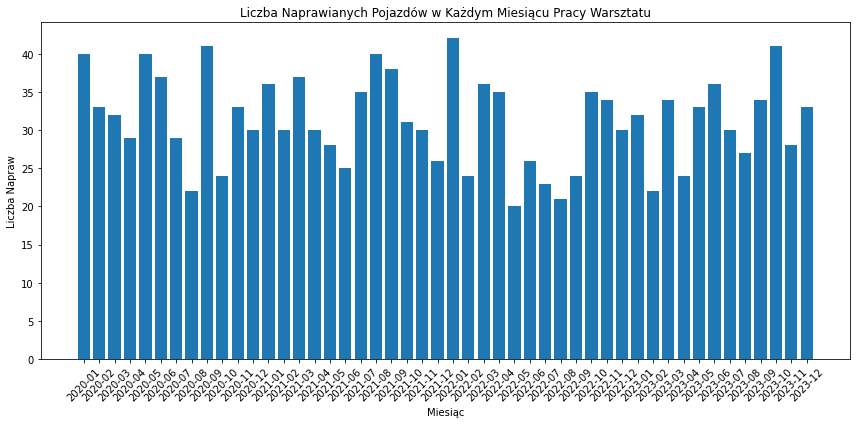

Query 3 result: [(217, Decimal('9962.00')), (120, Decimal('6709.00')), (183, Decimal('5352.00')), (123, Decimal('4889.00')), (239, Decimal('4685.00')), (125, Decimal('4403.00')), (88, Decimal('4083.00')), (55, Decimal('3633.00')), (6, Decimal('3547.00')), (218, Decimal('3182.00'))]
DataFrame df_okazje:
   ID Pojazdu     Zysk
0         217  9962.00
1         120  6709.00
2         183  5352.00
3         123  4889.00
4         239  4685.00
5         125  4403.00
6          88  4083.00
7          55  3633.00
8           6  3547.00
9         218  3182.00
Best deals DataFrame:
   ID Pojazdu     Zysk
0         217  9962.00
1         120  6709.00
2         183  5352.00
3         123  4889.00
4         239  4685.00
5         125  4403.00
6          88  4083.00
7          55  3633.00
8           6  3547.00
9         218  3182.00


In [134]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    'host': 'giniewicz.it',
    'user': 'team16',
    'password': '---',
    'database': 'team16'
}

# Connect to the database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Check if there are any entries in the Naprawy table
cursor.execute("SELECT COUNT(*) FROM Naprawy")
count_naprawy = cursor.fetchone()[0]
print(f"Number of entries in Naprawy: {count_naprawy}")

# Check if there are any entries in the Pojazdy table
cursor.execute("SELECT COUNT(*) FROM Pojazdy")
count_pojazdy = cursor.fetchone()[0]
print(f"Number of entries in Pojazdy: {count_pojazdy}")

# Check if the marka field in the Pojazdy table has values
cursor.execute("SELECT DISTINCT marka FROM Pojazdy")
distinct_marka = cursor.fetchall()
print(f"Distinct marka values in Pojazdy: {distinct_marka}")

# Query 1: Odsetek naprawianych marek pojazdów
query1 = """
SELECT p.marka, 
       COUNT(*) * 100.0 / (SELECT COUNT(*) FROM Naprawy) AS odsetek_napraw
FROM Naprawy n
JOIN Pojazdy p ON n.id_pojazdu = p.id_pojazdu
GROUP BY p.marka;
"""

# Execute the query and fetch the results
cursor.execute(query1)
result1 = cursor.fetchall()

# Debug: Check the result
print("Query 1 result:", result1)

# Convert to a DataFrame
df_odsetek = pd.DataFrame(result1, columns=['Marka', 'Odsetek Napraw'])
print("DataFrame df_odsetek:")
print(df_odsetek)

# Query 2: Liczba naprawianych pojazdów w każdym miesiącu pracy warsztatu
query2 = """
SELECT DATE_FORMAT(n.data_przyjecia, '%Y-%m') AS miesiac, 
       COUNT(*) AS liczba_napraw
FROM Naprawy n
GROUP BY DATE_FORMAT(n.data_przyjecia, '%Y-%m');
"""

# Execute the query and fetch the results
cursor.execute(query2)
result2 = cursor.fetchall()

# Debug: Check the result
print("Query 2 result:", result2)

# Convert to a DataFrame
df_naprawy = pd.DataFrame(result2, columns=['Miesiac', 'Liczba Napraw'])
print("DataFrame df_naprawy:")
print(df_naprawy)

# Plot the number of repairs per month
plt.figure(figsize=(12, 6))
plt.bar(df_naprawy['Miesiac'], df_naprawy['Liczba Napraw'])
plt.xlabel('Miesiąc')
plt.ylabel('Liczba Napraw')
plt.title('Liczba Naprawianych Pojazdów w Każdym Miesiącu Pracy Warsztatu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Query 3: Najlepsze okazje
query3 = """
SELECT ks.id_pojazdu, 
       ks.cena_sprzedazy - ks.cena_kupna - IFNULL(SUM(c.cena_elementow), 0) AS zysk
FROM Kupnosprzedaz ks
LEFT JOIN Naprawy n ON ks.id_pojazdu = n.id_pojazdu
LEFT JOIN Czesci c ON n.id_naprawy = c.id_naprawy
WHERE ks.cena_sprzedazy IS NOT NULL
GROUP BY ks.id_pojazdu, ks.cena_sprzedazy, ks.cena_kupna
ORDER BY zysk DESC
LIMIT 10;
"""

# Execute the query and fetch the results
cursor.execute(query3)
result3 = cursor.fetchall()

# Debug: Check the result
print("Query 3 result:", result3)

# Convert to a DataFrame
df_okazje = pd.DataFrame(result3, columns=['ID Pojazdu', 'Zysk'])
print("DataFrame df_okazje:")
print(df_okazje)

# Close the cursor and connection
cursor.close()
conn.close()

# Display the DataFrame of the best deals
print("Best deals DataFrame:")
print(df_okazje)